Suicidios 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [39]:
data = pd.read_csv("C:/Users/santi/Downloads/suicidios/master.csv")

In [40]:
## Explorar los datos
data.columns
## Limpiar los datos
selected_columns = ['country', 'sex', 'gdp_per_capita ($)', 'suicides/100k pop', 'age', 'suicides_no']
data_clean = data[selected_columns]
data_clean



,country,sex,gdp_per_capita ($),suicides/100k pop,age,suicides_no
0,Albania,male,796,6.71,15-24 years,21
1,Albania,male,796,5.19,35-54 years,16
2,Albania,female,796,4.83,15-24 years,14
3,Albania,male,796,4.59,75+ years,1
4,Albania,male,796,3.28,25-34 years,9
...,...,...,...,...,...,...
27815,Uzbekistan,female,2309,2.96,35-54 years,107
27816,Uzbekistan,female,2309,2.58,75+ years,9
27817,Uzbekistan,male,2309,2.17,5-14 years,60
27818,Uzbekistan,female,2309,1.67,5-14 years,44


Obtener el número total de suicidios

In [41]:
suicidios_totales = sum(data_clean['suicides_no'])
print(f"Entre los años 1987 y 2016 {suicidios_totales} personas se suicidaron" )

Entre los años 1987 y 2014 6748420 personas se suicidaron


In [42]:
# Quitar la columna suicides_no 
selected_columns = ['country', 'sex', 'gdp_per_capita ($)', 'suicides/100k pop', 'age']
data_clean = data_clean[selected_columns]
data_clean

,country,sex,gdp_per_capita ($),suicides/100k pop,age
0,Albania,male,796,6.71,15-24 years
1,Albania,male,796,5.19,35-54 years
2,Albania,female,796,4.83,15-24 years
3,Albania,male,796,4.59,75+ years
4,Albania,male,796,3.28,25-34 years
...,...,...,...,...,...
27815,Uzbekistan,female,2309,2.96,35-54 years
27816,Uzbekistan,female,2309,2.58,75+ years
27817,Uzbekistan,male,2309,2.17,5-14 years
27818,Uzbekistan,female,2309,1.67,5-14 years


Proporción de suicidios hombres y mujeres, gráfico pie

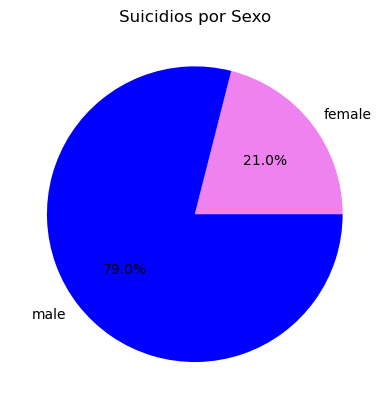

In [43]:
grouped = data_clean.groupby('sex')['suicides/100k pop'].sum()

# Plotting the pie chart
labels = grouped.index
values = grouped.values
colors = ['violet', 'blue' ]
plt.pie(values, labels=labels, autopct='%1.1f%%', colors= colors)
plt.title('Suicidios por Sexo')
plt.show()

##### Los hombres se han suicidado más que las mujeres del año 1985 al 2016.

Correlación entre número de suicidios y GDP per cápita

In [44]:
correlation = data_clean['gdp_per_capita ($)'].corr(data_clean['suicides/100k pop'])

print("Correlación entre GDP per capita y Suicides/100k pop:", correlation)

Correlación entre GDP per capita y Suicides/100k pop: 0.0017851337973441921


¿Existe una relación significativa entre suicidios y edad?

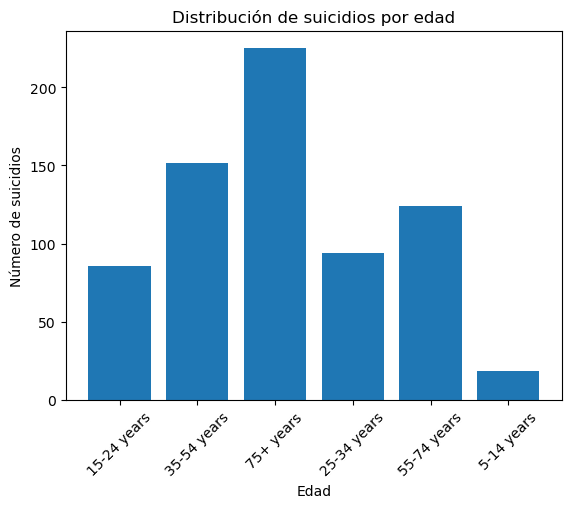

In [50]:
data_sorted = data_clean.sort_values('age')
# Crear el histograma
plt.bar(data_clean['age'], data_clean['suicides/100k pop'])
plt.xlabel('Edad')
plt.ylabel('Número de suicidios')
plt.title('Distribución de suicidios por edad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

In [61]:
#ANOVA
formula = 'Q("suicides/100k pop") ~ C(country) + C(sex) + C(age)'
model = ols(formula, data=data_sorted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                  sum_sq       df            F  PR(>F)
C(country)  2.204729e+06    100.0   125.761021     0.0
C(sex)      1.533003e+06      1.0  8744.477669     0.0
C(age)      1.404436e+06      5.0  1602.222475     0.0
Residual    4.858394e+06  27713.0          NaN     NaN


In [63]:
# Comparación por Grupos
posthoc = pairwise_tukeyhsd(data_clean['suicides/100k pop'], data_clean['country'])
print(posthoc)


c:\Users\santi\miniconda3\envs\psych\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
           group1                       group2            meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------------
                     Albania          Antigua and Barbuda    -2.95    1.0  -8.9392   3.0392  False
                     Albania                    Argentina   6.9664 0.0011   1.1533  12.7796   True
                     Albania                      Armenia   -0.227    1.0  -6.3324   5.8784  False
                     Albania                        Aruba   6.0002  0.401   -1.129  13.1294  False
                     Albania                    Australia   9.4899    0.0   3.6367  15.3431   True
                     Albania                      Austria  20.2569    0.0  14.4754  26.0384   True
                     Albania                   Azerbaijan  -1.6475    1.0   -8.499    5.204  False
          

In [64]:
posthoc = pairwise_tukeyhsd(data_clean['suicides/100k pop'], data_clean['sex'])
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
female   male  14.8465   0.0 14.4364 15.2565   True
---------------------------------------------------


In [65]:
posthoc = pairwise_tukeyhsd(data_clean['suicides/100k pop'], data_clean['age'])
print(posthoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj  lower    upper   reject
---------------------------------------------------------------
15-24 years 25-34 years   3.2397   0.0   2.1998   4.2797   True
15-24 years 35-54 years   6.0003   0.0   4.9603   7.0402   True
15-24 years  5-14 years  -8.3271   0.0  -9.3689  -7.2854   True
15-24 years 55-74 years   7.2084   0.0   6.1685   8.2484   True
15-24 years   75+ years  15.0083   0.0  13.9683  16.0482   True
25-34 years 35-54 years   2.7606   0.0   1.7206   3.8005   True
25-34 years  5-14 years -11.5668   0.0 -12.6086 -10.5251   True
25-34 years 55-74 years   3.9687   0.0   2.9287   5.0086   True
25-34 years   75+ years  11.7685   0.0  10.7286  12.8085   True
35-54 years  5-14 years -14.3274   0.0 -15.3692 -13.2856   True
35-54 years 55-74 years   1.2081 0.012   0.1682   2.2481   True
35-54 years   75+ years    9.008   0.0    7.968  10.0479   True
 5-14 years 55-74 years  15.5355   0.0  